# Title and overview

In this notebook, we predict **Revenue** using sales data.
We'll go through:
1. Data extraction and cleaning
2. Feature extraction
3. Encoding categorical variables
4. Training an XGBoost regressor
5. Evaluating the model
6. Get feature importance

# Data extraction

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("online_retail_II.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


## Basic inception

In [3]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [4]:
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


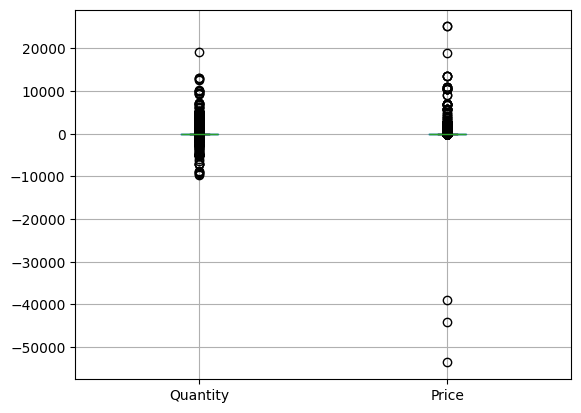

In [5]:
# Check for outliers
df.boxplot(column=['Quantity', 'Price'])
plt.show()

In [6]:
# no. of appearance of each unique values in each column
for col in df.columns:
    print(col, df[col].isna().sum() ,df[col].notna().sum() , df[col].nunique(), int((df[col].notna().sum())/df[col].nunique()))

Invoice 0 525461 28816 18
StockCode 0 525461 4632 113
Description 2928 522533 4681 111
Quantity 0 525461 825 636
InvoiceDate 0 525461 25296 20
Price 0 525461 1606 327
Customer ID 107927 417534 4383 95
Country 0 525461 40 13136


# Preprocessing

## Data cleaning

In [7]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518596 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      518596 non-null  object 
 1   StockCode    518596 non-null  object 
 2   Description  515668 non-null  object 
 3   Quantity     518596 non-null  int64  
 4   InvoiceDate  518596 non-null  object 
 5   Price        518596 non-null  float64
 6   Customer ID  410763 non-null  float64
 7   Country      518596 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.6+ MB


In [11]:
# check for quantity and price < 0
print((df["Quantity"] < 0).sum())
print((df["Price"] < 0).sum())
df = df[df["Quantity"] >= 0]
df = df[df["Price"]>= 0]
# delete rows with invoice number starting with c
df = df[~df["Invoice"].str.startswith("c", na=False)]
#Handle missing values — e.g., drop rows with missing CustomerID or Description.
df = df.dropna(subset=['InvoiceDate'])
df.info()

0
0
<class 'pandas.core.frame.DataFrame'>
Index: 506291 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      506291 non-null  object 
 1   StockCode    506291 non-null  object 
 2   Description  505190 non-null  object 
 3   Quantity     506291 non-null  int64  
 4   InvoiceDate  506291 non-null  object 
 5   Price        506291 non-null  float64
 6   Customer ID  400947 non-null  float64
 7   Country      506291 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.8+ MB


## Feature extraction

In [ ]:
# Encoding InvoiceDate into time-of-day categories
# Morning (6 AM–12 PM)
# Afternoon (12 PM–6 PM)
# Evening (6 PM–12 AM)
# Day of week (0=Monday, 6=Sunday)
# Month → captures seasonal effects (e.g., November & December spikes).
# IsWeekend flag (1 if Saturday or Sunday, else 0)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek
df["Month"] = df["InvoiceDate"].dt.month
df["IsWeekend"] = df["DayOfWeek"] >= 5
df["Hour"] = df["InvoiceDate"].dt.hour
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["TimeOfDay"] = df["Hour"].apply(get_time_of_day)
#Create a Revenue column = Quantity * UnitPrice (your main target).
df["Revenue"]= df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DayOfWeek,Month,IsWeekend,Hour,TimeOfDay,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,12,False,7,Morning,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,12,False,7,Morning,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,12,False,7,Morning,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,12,False,7,Morning,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,12,False,7,Morning,30.0


In [ ]:
# Convert booleans
df['IsWeekend'] = df['IsWeekend'].astype(int)

# Label encode categorical text columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
df['TimeOfDay'] = encoder.fit_transform(df['TimeOfDay'])


# Model training

## Dataset preparation

In [ ]:
# Make a copy of your dataframe
df_features = df.copy()
# Drop columns that are not useful for the model
df_features = df_features.drop(columns=['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Customer ID'])


In [22]:
df_features.head()

,Quantity,Price,Country,DayOfWeek,Month,IsWeekend,Hour,TimeOfDay,Revenue
0,12,6.95,37,1,12,0,7,2,83.4
1,12,6.75,37,1,12,0,7,2,81.0
2,12,6.75,37,1,12,0,7,2,81.0
3,48,2.10,37,1,12,0,7,2,100.8
4,24,1.25,37,1,12,0,7,2,30.0


## Set features and target

In [34]:
# Split features (X) and target (y)
X = df_features.drop(columns=['Revenue'])
y = df_features['Revenue']

## Train/test split

In [35]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train XGBoost regressor

In [36]:
model = XGBRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=6,       
    random_state=42
)

model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Evaluate model

In [ ]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: 0.49765641745356537
Mean Absolute Error: 2.4906352175499893


## Get feature importance

     Feature  Importance
1      Price    0.410810
0   Quantity    0.243618
2    Country    0.107710
3  DayOfWeek    0.103921
4      Month    0.062880
6       Hour    0.055058
7  TimeOfDay    0.016004
5  IsWeekend    0.000000


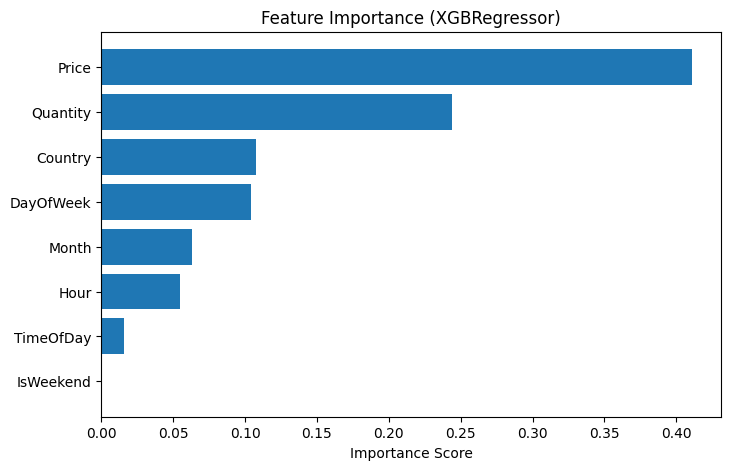

In [ ]:
importance = model.feature_importances_
features = X.columns

# Make a dataframe and sort
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

# visualize
plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance (XGBRegressor)")
plt.show()
